# Lab 4 - part2
### Edge Detection

https://github.com/scikit-image/scikit-image/blob/master/skimage/filters/edges.py

http://scikit-image.org/docs/0.11.x/auto_examples/plot_edge_filter.html

http://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html



In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2
from scipy.ndimage import gaussian_filter,laplace


In [2]:
'''
1. Built-in Sobel, Prewill, Roberts, Canny
2. Custom Sobel (V-H-Both)
3. Custom LoG
'''

'\n1. Built-in Sobel, Prewill, Roberts, Canny\n2. Custom Sobel (V-H-Both)\n3. Custom LoG\n'

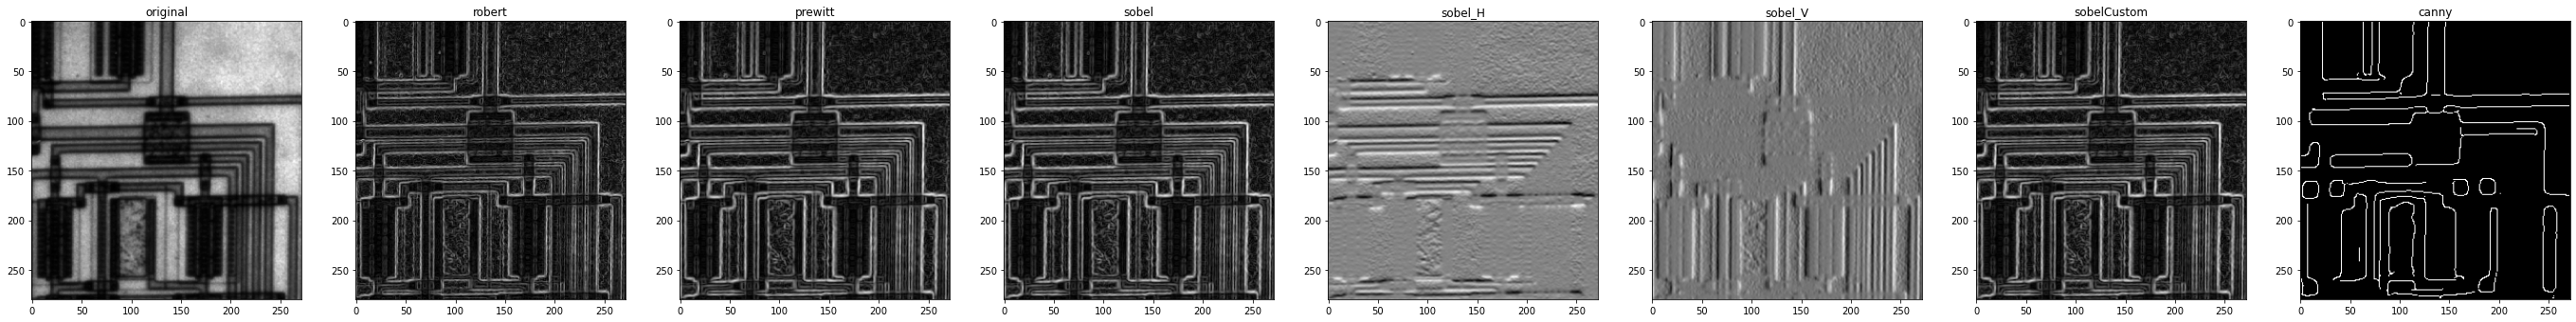

In [3]:
# 1. Built-in Sobel, Prewill, Roberts, Canny

img =io.imread('circuit.tif')

robertImage=roberts(img)
# prewittImage=robertImage.copy()
prewittImage=prewitt(img)
sobelImage=sobel(img)
sobelHImage=sobel_h(img)
sobelVImage=sobel_v(img)
sobelCustom=np.sqrt(np.square(sobelHImage)+np.square(sobelVImage))
cannyImage=canny(img,sigma=3,low_threshold=10,high_threshold=40)
show_images([img,robertImage,prewittImage,sobelImage,sobelHImage,sobelVImage,sobelCustom,cannyImage],['original','robert','prewitt','sobel','sobel_H','sobel_V','sobelCustom','canny'])



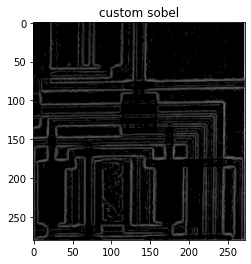

In [4]:
# 3. Custom LoG
# 2. Custom Sobel (V-H-Both)
def CUST_SOBEL(img):
    hy=np.array(
    [[-1,0,1],
    [-2,0,2],
    [-1,0,1]])
    
    hx=np.array(
    [[-1,-2,-1],
    [0,0,0],
    [1,2,1]])
    
    twod=np.pad(img,1)#to pad the input mode='edge'
     #     sizey=twod.shape[0] #get y size
     #     sizex=twod.shape[1] #get x size

    imageofx=np.zeros((img.shape[0],img.shape[1]))
    imageofy=np.zeros((img.shape[0],img.shape[1]))
    

    for x in range(len(twod)):
    
        if(x==twod.shape[0]-2):
            break
        for y in range(len(twod[0])):
            if(y==twod.shape[1]-2):
              break
            window=np.zeros((3,3))
            window[0]=twod[x][y:y+3]
            window[1]=twod[x+1][y:y+3]
            window[2]=twod[x+2][y:y+3]
            window_x=window*hx
            window_y=window*hy
            imageofx[x][y]=np.sum(window_x)
            imageofy[x][y]=np.sum(window_y)
            
    
    imagenew=np.sqrt(np.square(imageofx)+np.square(imageofy))
    imagenew[imagenew<80]=0
    return imagenew           
                


img=io.imread('circuit.tif')
sut=CUST_SOBEL(img)



show_images([sut],['custom sobel'])



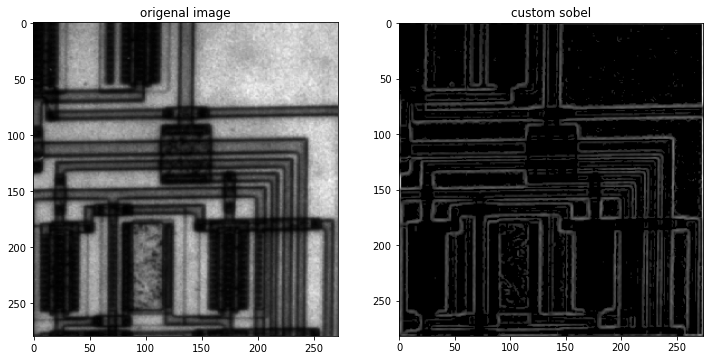

In [5]:
# 3. Custom LoG
# 2. Custom Sobel (V-H-Both)
from scipy.signal import convolve2d
def CUST_SOBEL(img):
    hy=np.array(
    [[-1,0,1],
    [-2,0,2],
    [-1,0,1]])
    
    hx=np.array(
    [[-1,-2,-1],
    [0,0,0],
    [1,2,1]])
    
    imageofx=convolve2d(img,hy)
    imageofy=convolve2d(img,hx)
#     print(imageofx)
#     print(imageofy)
    
    imagenew=np.sqrt(np.square(imageofx)+np.square(imageofy))
    imagenew[imagenew<80]=0

#     print(imagenew)
#     imagenew[imagenew<150]=0
    return imagenew           
                


img=io.imread('circuit.tif')
sut=CUST_SOBEL(img)
# sut2=sut.copy()
# sut2[sut2<80]=0


show_images([img,sut],['origenal image','custom sobel'])



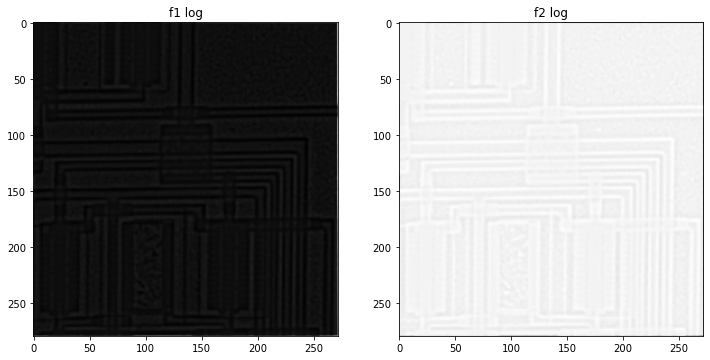

In [6]:
# 3. Custom LoG
# 2. Custom Sobel (V-H-Both)
from skimage.filters import gaussian
def LOG(clean):
    f2=np.array(
    [[0,1,0],
    [1,-4,1],
    [0,1,0]])
    
    f1=np.array(
    [[-1,-1,-1],
    [-1,8,-1],
    [-1,-1,-1]])
    

    img=gaussian(clean, sigma=1.2,mode='nearest', cval=0, preserve_range=False, truncate=4.0)
    twod=np.pad(img,1)#to pad the input mode='edge'
     #     sizey=twod.shape[0] #get y size
     #     sizex=twod.shape[1] #get x size

    imageF1=np.zeros((img.shape[0],img.shape[1]))
    imageF2=np.zeros((img.shape[0],img.shape[1]))

    for x in range(len(twod)):
    
        if(x==twod.shape[0]-2):
            break
        for y in range(len(twod[0])):
            if(y==twod.shape[1]-2):
                break
            window=np.zeros((3,3))
#             window[0]=twod[x,y:y+3]
#             window[1]=twod[x+1,y:y+3]
#             window[2]=twod[x+2,y:y+3]
            window=twod[x:x+3,y:y+3]
            window_x=window*f1
            window_y=window*f2
            imageF1[x][y]=np.sum(window_x)
            imageF2[x][y]=np.sum(window_y)
            
    
#      imagenew=np.sqrt(np.square(imageofx)+np.square(imageofy))
#     imageF1Thres=imageF1
    #imageF1Thres[imageF1<1]=0
#     imageF2Thres=imageF2
#     imageF2Thres[imageF2<10]=0

#     imageF1=imageF1>0
#     imageF2=imageF2>0
#     imageF1[imageF1<0.031]=0
#     imageF2[imageF2<0.031]=0
    
    return imageF1,imageF2        
                


img=io.imread('circuit.tif')
sut,sut2=LOG(img)

# thres1=sut[0]
# thres2=sut[1]
# thres1[sut[0]<1]=0
# thres2[sut[1]<1]=0
# io.imshow(sut)
# io.show()
# io.imshow(sut2)
# io.show()
show_images([sut,sut2],['f1 log','f2 log'])



[[ -14  -28  -42 ... -431 -285 -142]
 [ -28   70   42 ...  430  702 -291]
 [ -43   40   -2 ...   -4  474 -441]
 ...
 [ -93   47  -10 ...    1  151 -185]
 [ -58  103  104 ...  222  286 -124]
 [ -27  -65 -111 ... -222 -136  -62]]


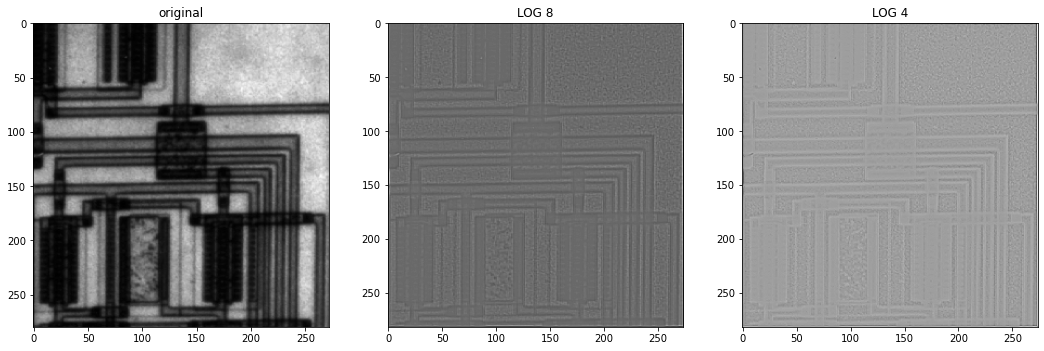

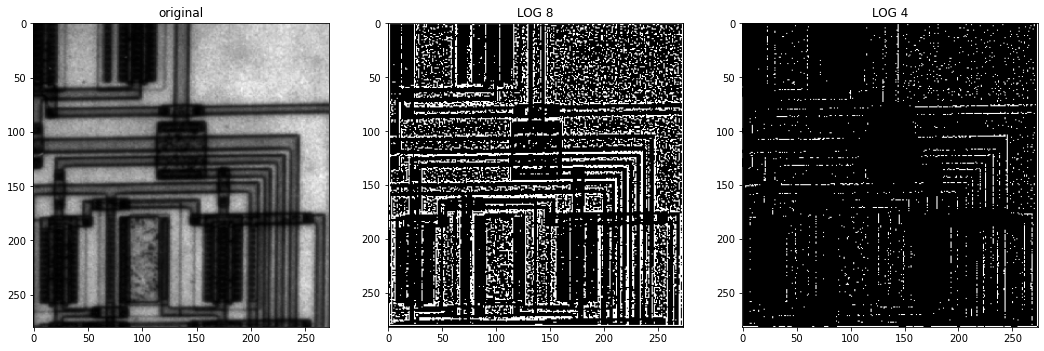

In [7]:
# 3. Custom LoG
# 2. Custom Sobel (V-H-Both)
thresh=20
from skimage.filters import gaussian,laplace
def LOG(img):
    f2=np.array(
    [[0,1,0],
    [1,-4,1],
    [0,1,0]])
    
    f1=np.array(
    [[-1,-1,-1],
    [-1,8,-1],
    [-1,-1,-1]])
    clean=img.copy()
    clean=gaussian_filter(clean, sigma=.4)
#     clean =
    imageF1=convolve2d(clean,f1)
    imageF2=convolve2d(clean,f2)
    print(imageF1)
    show_images([img,imageF1,imageF2],['original','LOG 8','LOG 4'])
    
    imageF1[imageF1<=thresh]=0
    imageF1[imageF1>thresh]=255
    
    imageF2[imageF2<=thresh]=0
    imageF2[imageF2>thresh]=255
    
    show_images([img,imageF1*255,imageF2*255],['original','LOG 8','LOG 4'])

    return imageF1 ,imageF2       
                


img=io.imread('circuit.tif')
sut,sut2=LOG(img)
# show_images([img,sut,sut2],['original','LOG 8','LOG 4'])


In [8]:
'''
Optional
1-Make edge detection
2-Multiply by factor < 1
3-Subtract (Orginal Image) - (Edge Detection Image)
'''

arr=np.array([
    [1,1,1],
    [1,1,1],
    [1,1,1]
])

arr[1][1]=5
print(np.sum(arr))

13
